In [160]:
!pip install optuna

In [161]:
# from google.colab import drive
import pandas as pd
import numpy as np
import nltk
import pandas as pd
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
from collections import Counter
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import optuna
import sklearn.model_selection
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif


# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [162]:
rootpath = './data'

for file_name in os.listdir(rootpath):
    print(file_name)

file_name = 'actually_merged_data_v1_title_artist.csv'

song_lyrics.csv
Spotify_Youtube.csv
Spotify_data.xlsx
reviews.csv
actually_merged_data_v1_title_artist.csv


In [163]:
full_path = os.path.join(rootpath, file_name)
print(full_path)

/content/drive/MyDrive/Umich - Data Science/SIADS milestone I/Datasets/actually_merged_data_v1_title_artist.csv


In [164]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

def normalize_contractions(text):
    contractions = {
        "ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have",
        "'cause": "because", "could've": "could have", "couldn't": "could not",
        "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not",
        "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not",
        "haven't": "have not", "he'd": "he would", "he'd've": "he would have", "he'll": "he will",
        "he'll've": "he will have", "he's": "he is", "how'd": "how did", "how'd'y": "how do you",
        "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have",
        "I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have",
        "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will",
        "it'll've": "it will have", "it's": "it is", "let's": "let us", "ma'am": "madam",
        "mayn't": "may not", "might've": "might have", "mightn't": "might not",
        "mightn't've": "might not have", "must've": "must have", "mustn't": "must not",
        "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
        "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have",
        "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
        "she'd": "she would", "she'd've": "she would have", "she'll": "she will",
        "she'll've": "she will have", "she's": "she is", "should've": "should have",
        "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
        "so's": "so is", "that'd": "that would", "that'd've": "that would have", "that's": "that is",
        "there'd": "there would", "there'd've": "there would have", "there's": "there is",
        "they'd": "they would", "they'd've": "they would have", "they'll": "they will",
        "they'll've": "they will have", "they're": "they are", "they've": "they have",
        "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have",
        "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have",
        "weren't": "were not", "what'll": "what will", "what'll've": "what will have",
        "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is",
        "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have",
        "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
        "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not",
        "won't've": "will not have", "would've": "would have", "wouldn't": "would not",
        "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
        "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have",
        "you'd": "you would", "you'd've": "you would have", "you'll": "you will",
        "you'll've": "you will have", "you're": "you are", "you've": "you have"
    }
    contractions_re = re.compile('(%s)' % '|'.join(contractions.keys()))
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

# Define text cleaning functions
def lower_case(text):
    return text.lower()

def punctuation_remove(text):
    # Remove punctuation using regex
    text = re.sub(r'[^\w\s]', '', text)
    return text

def lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

additional_stopwords = {
    "im", "youre", "aint", "cause", "yeah", "cant", "wa", "got", "em", "gonna", "wanna", "yall",
    "ive", "dont", "didnt", "doesnt", "wasnt", "werent", "shes", "hes", "its", "thats", "theres",
    "whos", "whats", "wheres", "hows", "theyre", "theyve", "theyll", "couldnt", "wouldnt", "shouldnt"
}

def remove_stopwords(text, additional_stopwords=None):
    stop_words = set(stopwords.words('english'))
    if additional_stopwords:
        stop_words.update(additional_stopwords)
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

def remove_keywords(text, keywords):
    pattern = re.compile(r'\b(?:{})\b'.format('|'.join(keywords)), re.IGNORECASE)
    return pattern.sub('', text)

def clean_text(text, additional_stopwords=None):
    keywords_to_remove = ['verse','intro','chorus','Verse 1' ,'Verse 2',' Verse 3','Chorus 1','Chorus 2','Chorus 3','Chorus 4']
    text = normalize_contractions(text)
    lower_text = lower_case(text)
    remove_punc_text = punctuation_remove(lower_text)
    lemmatized_text = lemmatization(remove_punc_text)
    clean_text = remove_keywords(lemmatized_text, keywords_to_remove)
    final_clean_text = remove_stopwords(clean_text, additional_stopwords)
    return final_clean_text

dfs = []
count = 0
hashed = None
iter=0

chunk_size = 5000 #adjust this size depending on your system's memory #50000 takes way too long.
for chunk in pd.read_csv(full_path, chunksize=chunk_size):

  del chunk['features']
  del chunk['language_cld3']
  del chunk['language_ft']
  del chunk['id']
  del chunk['median_streams']
  del chunk['is_explicit']

  chunk = chunk[chunk['language'] == 'en']

  chunk_without_dup = chunk.drop_duplicates(subset='lyrics', keep='first')# - this is groupby

  chunk_without_dup['lyrics'] = chunk_without_dup['lyrics'].apply(lambda x: clean_text(x))
  #year

  del chunk_without_dup['language']

  dfs.append(chunk_without_dup)
  count += chunk_without_dup.shape[0]

  iter +=1

  if iter % 1000 == 0:
    print(f'{iter}: done')
    print(count)

print('chunk done')
song_lyrics_df = pd.concat(dfs)
song_lyrics_df.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


chunk done


,title_hash,artist_hash,title,artist,median_rank,highest_rank,min_date,max_date,url,album,...,af_liveness,af_valence,af_tempo,af_time_signature,title_genius,tag,artist_genius,year,views,lyrics
5,rapapapa,richbrian,Rapapapa (feat. RZA),Rich Brian,163.0,66,2019-07-26,2019-08-19,https://open.spotify.com/track/7sPoDigIbCWDS6A...,The Sailor,...,0.1140,0.504,126.936,4.0,Rapapapa,rap,Rich Brian,2019,131654,1 rich brian twofaced bitch pop dark finna was...
11,let my baby stay,amandlastenberg,Let My Baby Stay,Amandla Stenberg,15.5,3,2017-05-25,2017-06-11,https://open.spotify.com/track/7uCWAhAVOR487BV...,Let My Baby Stay,...,0.0724,0.197,102.251,4.0,Let My Baby Stay,rb,Amandla Stenberg,2017,17418,1 wa made love working half life ive addict sh...
15,in my room,yellowclawmustard,In My Room (feat. Ty Dolla $ign & Tyga),"Yellow Claw, Mustard",40.5,32,2017-01-01,2017-10-03,https://open.spotify.com/track/4Jk6fZmX3gGYYbH...,Blood For Mercy,...,0.0799,0.814,104.015,4.0,In My Room,rap,Yellow Claw & Mustard,2015,90578,ty dolla ign yellow claw mustard beat ho dolla...
16,california,charlottecardin,California,Charlotte Cardin,28.0,17,2018-04-16,2018-12-06,https://open.spotify.com/track/30qG3Y2GFpzOmRu...,California,...,0.1860,0.293,92.030,4.0,California,pop,Charlotte Cardin,2018,4214,miss every day la make cry ocean made way coas...
19,you i,twinsmith,You & I,Twinsmith,32.0,25,2018-08-26,2018-09-15,https://open.spotify.com/track/7gVs0xlYYqN7fYA...,Stay Cool,...,0.1600,0.204,102.014,4.0,You I,rock,Twinsmith,2017,2925,know disagree commonly something disguise noth...


In [165]:
song_lyrics_df.shape

(31137, 34)

In [166]:
song_lyrics_df.isnull().sum()

title_hash                0
artist_hash               0
title                     0
artist                    0
median_rank               0
highest_rank              0
min_date                  0
max_date                  0
url                       0
album                  2590
release_date           2587
duration_ms            2587
median_popularity      2587
highest_popularity     2587
total_streams             0
num_days_on_chart         0
af_danceability        2587
af_energy              2587
af_key                 2587
af_loudness            2587
af_mode                2587
af_speechiness         2587
af_acousticness        2587
af_instrumentalness    2587
af_liveness            2587
af_valence             2587
af_tempo               2587
af_time_signature      2587
title_genius              0
tag                       0
artist_genius             0
year                      0
views                     0
lyrics                    0
dtype: int64

Always split data before analysis - else, it would cause data leakage

In [167]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Perform the train-test split
train_df, test_df = train_test_split(song_lyrics_df, test_size=0.15, stratify=song_lyrics_df['tag'], random_state=42)

print(f"Training set size: {train_df.shape[0]}")
print(f"Test set size: {test_df.shape[0]}")

Training set size: 26466
Test set size: 4671


In [168]:
import pandas as pd
from collections import Counter
import re

def aggregate_top_words(group):
    word_counts = Counter()
    for words in group:
      word_counts.update(dict(words))
    most_common = word_counts.most_common(20)
    return most_common

def extract_top_words(lyric, top_n=20):
    words = re.findall(r'\b\w+\b', lyric.lower())
    word_counts = Counter(words)
    most_common = word_counts.most_common(top_n)
    return most_common


train_df['top_words'] = train_df['lyrics'].apply(lambda x: extract_top_words(x, top_n=20))

train_df['top_words'][:5]

38398    [(without, 9), (cannot, 6), (live, 5), (ooh, 4...
46163    [(two, 3), (one, 3), (whether, 3), (great, 2),...
57350    [(yeah, 22), (like, 14), (really, 12), (fuck, ...
58684    [(got, 26), (go, 26), (baby, 26), (ya, 24), (k...
19947    [(im, 22), (ready, 13), (get, 13), (war, 8), (...
Name: top_words, dtype: object

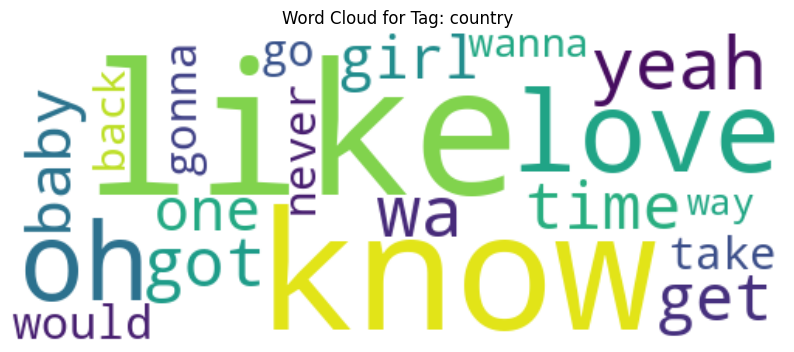

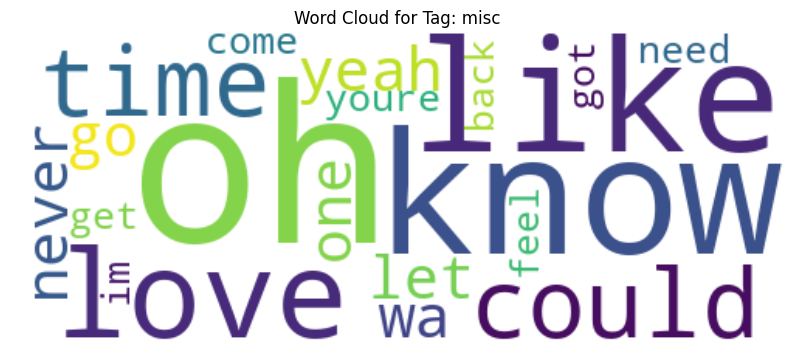

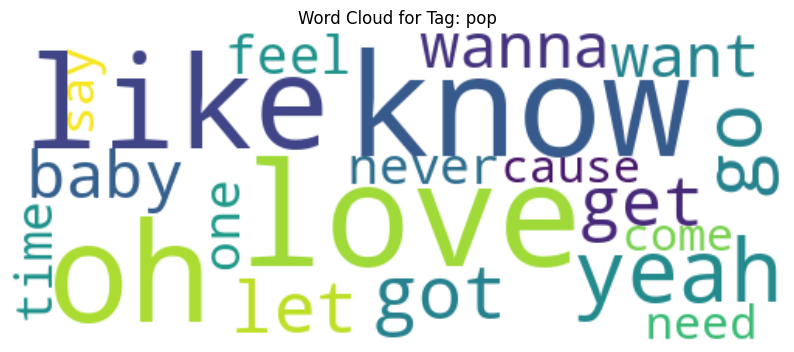

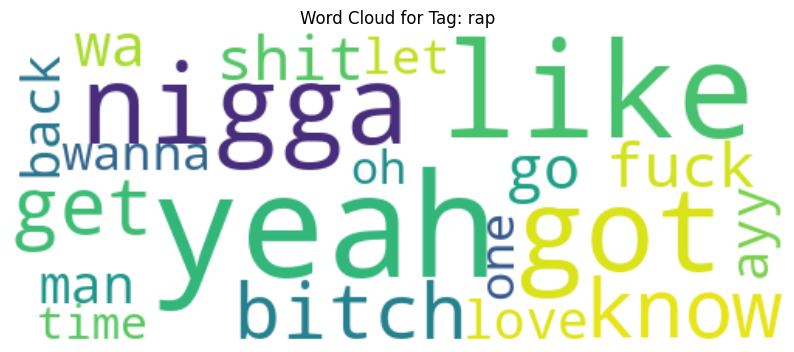

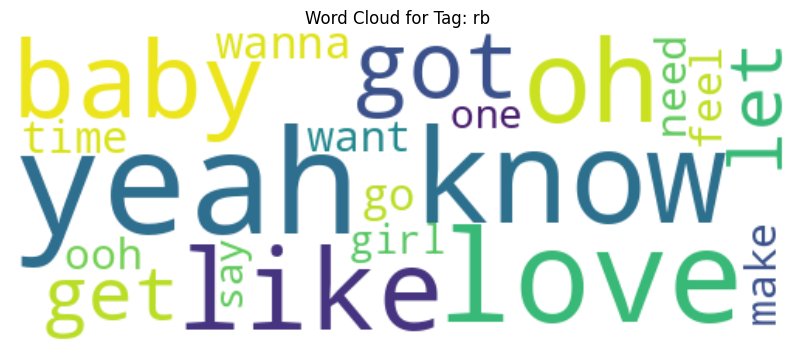

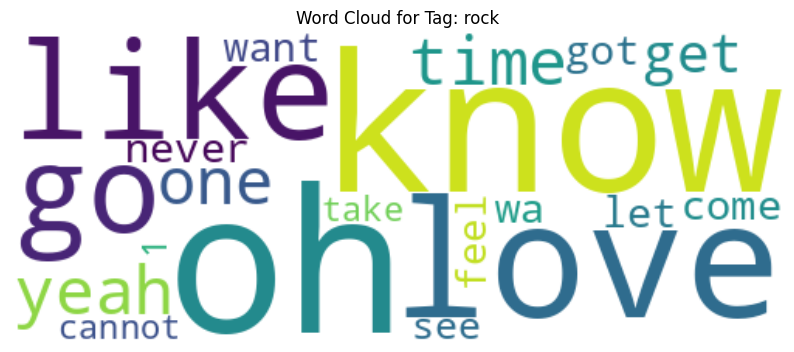

In [169]:
import pandas as pd
from collections import Counter
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
from joblib import Parallel, delayed
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_word_cloud(words_freq, tag):
    wordcloud = WordCloud(width=500, height=200, background_color='white')
    wordcloud.generate_from_frequencies(dict(words_freq))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Tag: {tag}")
    plt.axis('off')
    plt.show()

grouped_top_words = train_df.groupby('tag')['top_words'].apply(aggregate_top_words).reset_index()

# Create word clouds for each tag
for index, row in grouped_top_words.iterrows():
    tag = row['tag']
    top_words = row['top_words']
    create_word_cloud(top_words, tag)

Artists who usually ranks over 50 on Spotify chart

In [170]:
artist_top_rank_df = train_df[train_df['median_rank'] > 50]
print(artist_top_rank_df.shape)


top_5_artist = artist_top_rank_df.groupby(['artist']).agg({'median_rank':'sum','views':'sum'}).reset_index().sort_values(by = 'views')[-5:]['artist'].tolist()
top_5_artist

(9592, 35)


['Ed Sheeran', 'XXXTENTACION', 'Kendrick Lamar', 'Eminem', 'Drake']

Artists who usually ranks less than or equal to 50 on Spotify chart

In [171]:
artist_bottom_rank_df = train_df[train_df['median_rank'] <= 50]
print(artist_bottom_rank_df.shape)

bottom_5_artist = artist_bottom_rank_df.groupby(['artist']).agg({'median_rank':'sum','views':'sum'}).reset_index().sort_values(by = 'views')[:5]['artist'].tolist()
bottom_5_artist

(16874, 35)


['Crying Day Care Choir', 'Blithe', 'HARIZ', 'Last Lynx', 'Wolf Saga']

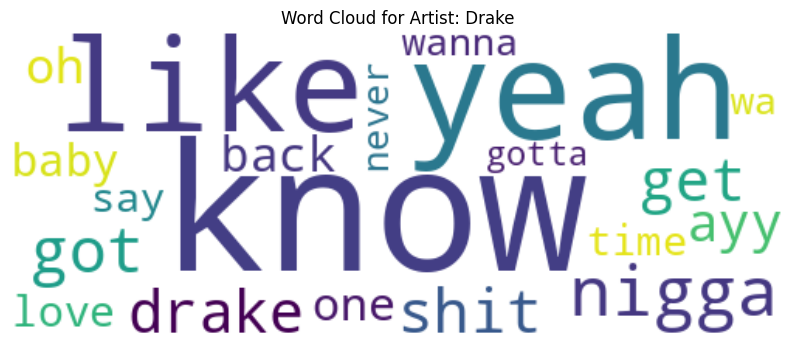

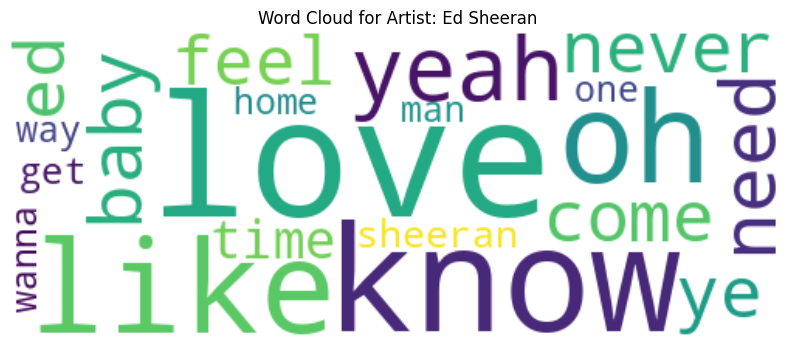

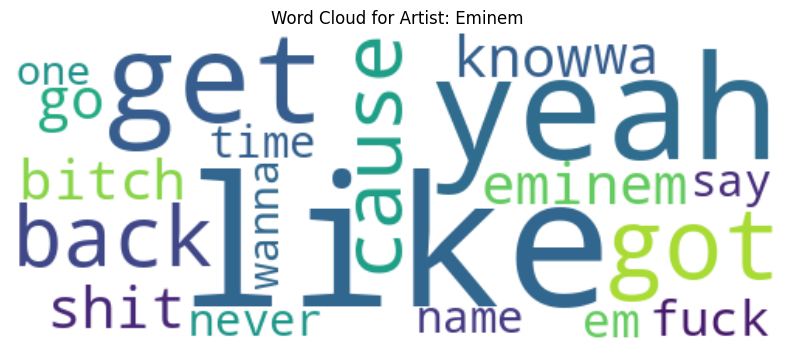

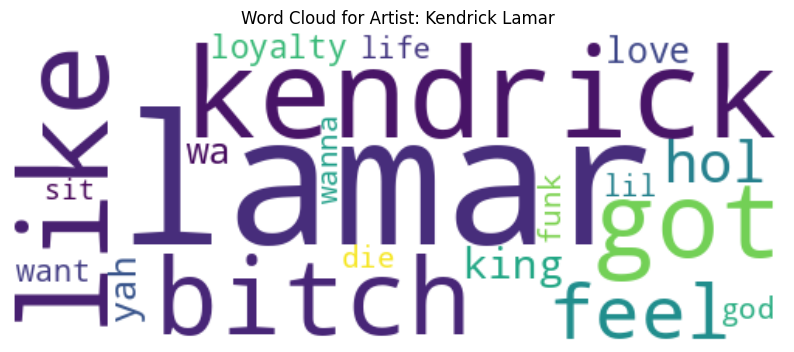

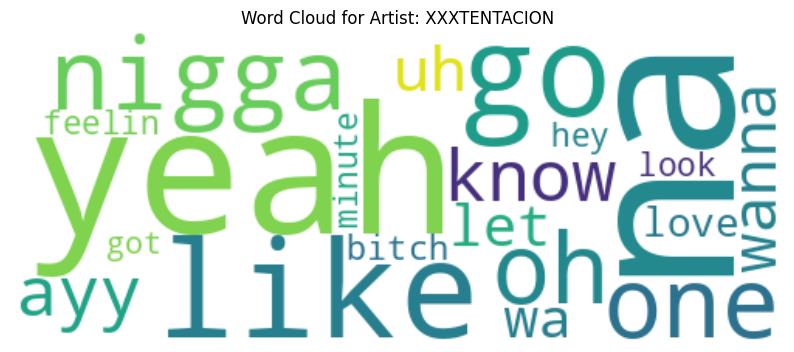

In [172]:
def create_word_cloud(words_freq, tag):
    wordcloud = WordCloud(width=500, height=200, background_color='white')
    wordcloud.generate_from_frequencies(dict(words_freq))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Artist: {tag}")
    plt.axis('off')
    plt.show()

def aggregate_top_words(group):
    word_counts = Counter()
    for words in group:
      word_counts.update(dict(words))
    most_common = word_counts.most_common(20)
    return most_common

top_df = artist_top_rank_df[artist_top_rank_df['artist'].isin(top_5_artist)]

top_df = top_df[['artist','top_words']]

top_df

grouped_top_df = top_df.groupby('artist')['top_words'].apply(aggregate_top_words).reset_index()

for index, row in grouped_top_df.iterrows():
    artist = row['artist']
    top_words = row['top_words']
    create_word_cloud(top_words, artist)

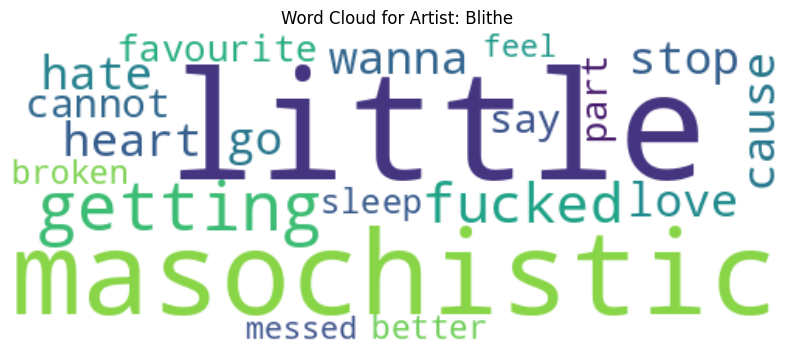

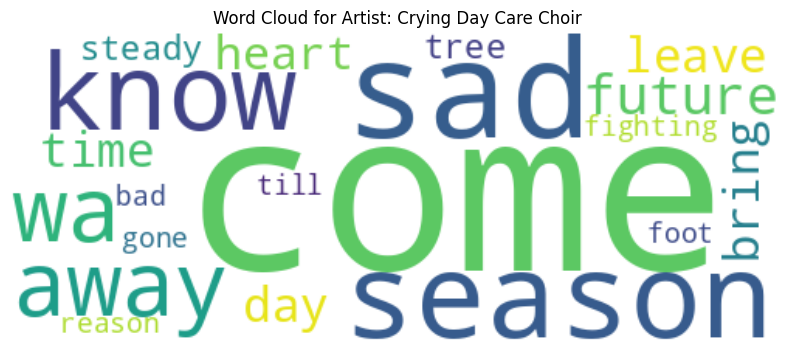

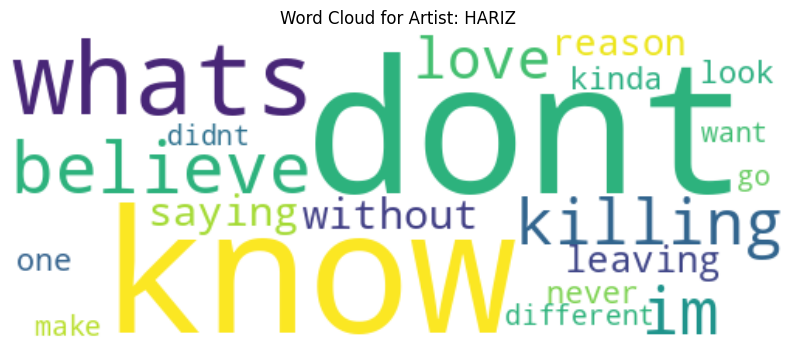

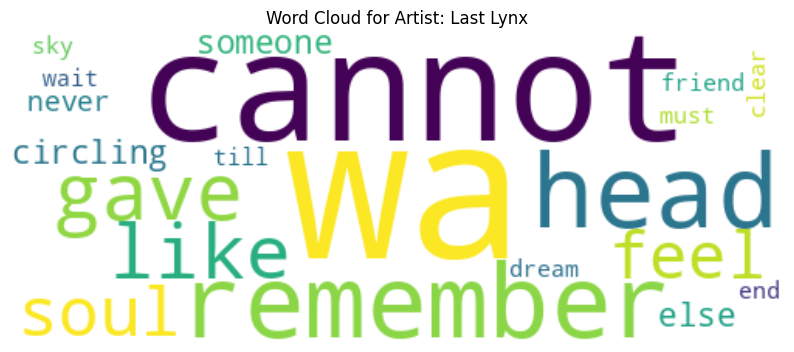

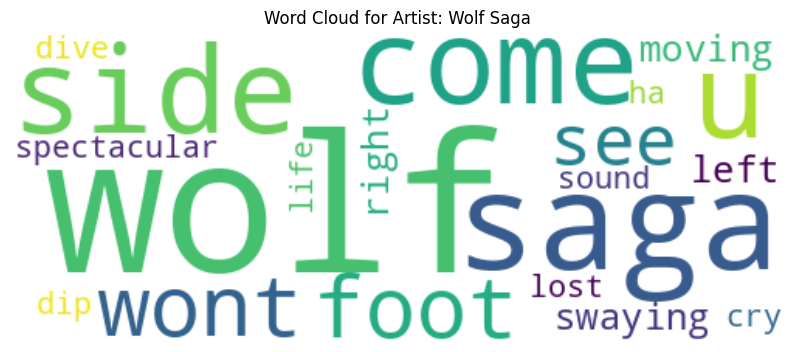

In [173]:
bottom_df = artist_bottom_rank_df[artist_bottom_rank_df['artist'].isin(bottom_5_artist)]

bottom_df = bottom_df[['artist','top_words']]

grouped_top_df = bottom_df.groupby('artist')['top_words'].apply(aggregate_top_words).reset_index()

for index, row in grouped_top_df.iterrows():
    artist = row['artist']
    top_words = row['top_words']
    create_word_cloud(top_words, artist)

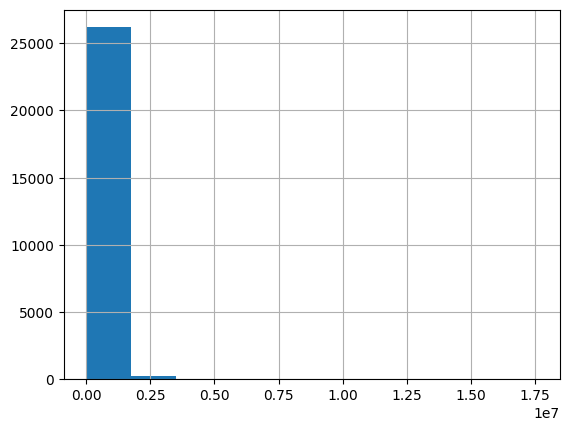

In [174]:
train_df['views'].hist()
plt.show()

In [175]:
train_df['views'].describe()

count    2.646600e+04
mean     1.323634e+05
std      4.332220e+05
min      1.000000e+03
25%      6.353000e+03
50%      2.464450e+04
75%      9.520550e+04
max      1.757563e+07
Name: views, dtype: float64

In [176]:
(2.493800e+04 + 9.579000e+04)/2

60364.0

In [177]:
print(train_df[train_df['views'] > 60364].shape)
print(train_df[train_df['views'] <= 60364].shape)

(8703, 35)
(17763, 35)


higher than 75% percentile of views will be labled as popular and lower or equal to 75% percentile will be labled as unpopular.

In [178]:
train_df['popular'] = train_df['views'].apply(lambda x: 0 if x <= 30364 else 1)
test_df['popular'] = test_df['views'].apply(lambda x: 0 if x <= 30364 else 1)

In [179]:
train_df['popular'].value_counts()

popular
0    14298
1    12168
Name: count, dtype: int64

let's do some analysis with popular songs

In [180]:
popular_df = train_df[train_df['popular'] == 1]

In [181]:
popular_df.columns

Index(['title_hash', 'artist_hash', 'title', 'artist', 'median_rank',
       'highest_rank', 'min_date', 'max_date', 'url', 'album', 'release_date',
       'duration_ms', 'median_popularity', 'highest_popularity',
       'total_streams', 'num_days_on_chart', 'af_danceability', 'af_energy',
       'af_key', 'af_loudness', 'af_mode', 'af_speechiness', 'af_acousticness',
       'af_instrumentalness', 'af_liveness', 'af_valence', 'af_tempo',
       'af_time_signature', 'title_genius', 'tag', 'artist_genius', 'year',
       'views', 'lyrics', 'top_words', 'popular'],
      dtype='object')

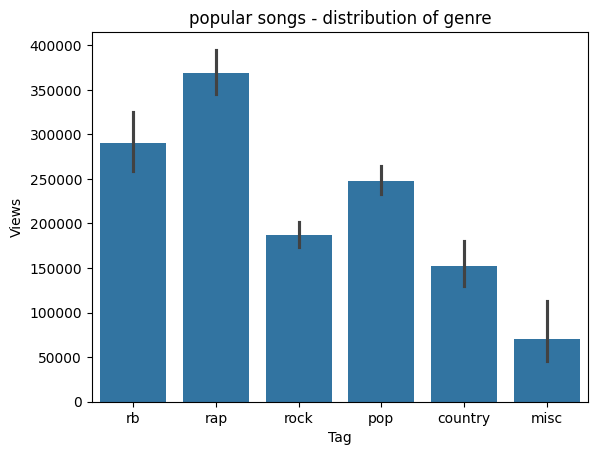

In [182]:
import seaborn as sns
sns.barplot(popular_df, x = 'tag', y='views')
plt.title('popular songs - distribution of genre')
plt.xlabel('Tag')
plt.ylabel('Views')
plt.show()

let's do some analysis with unpopular songs

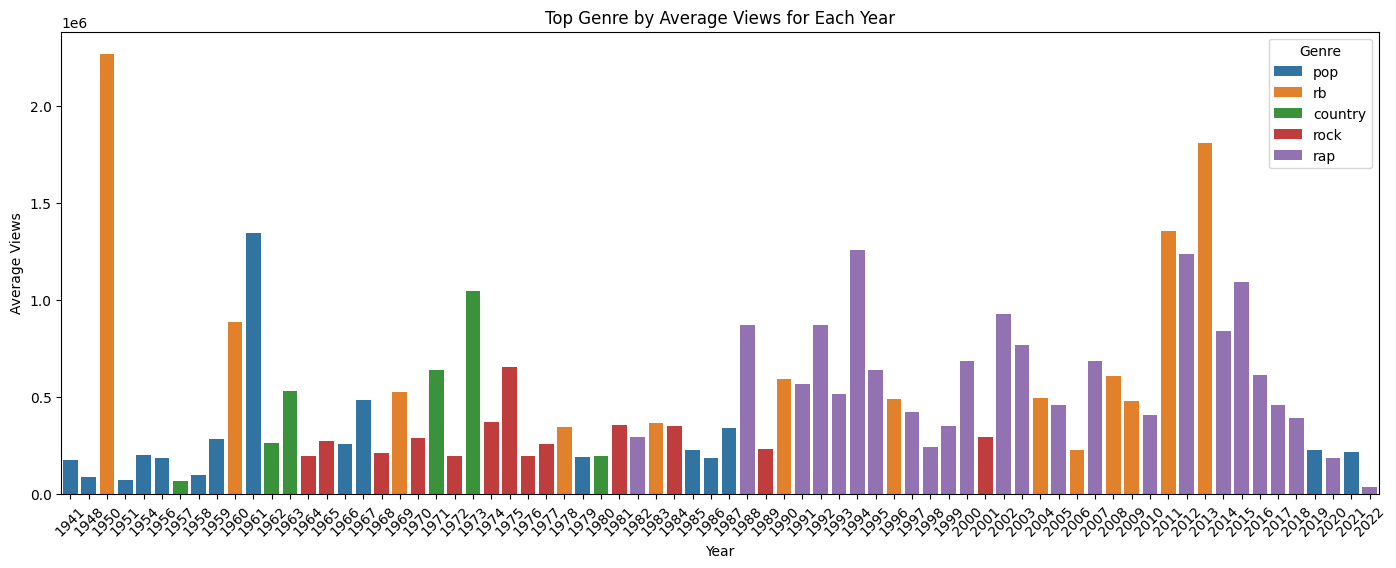

In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

grouped_df = popular_df.groupby(['year', 'tag']).agg({'views': 'mean'}).reset_index()

top_genre_per_year = grouped_df.loc[grouped_df.groupby('year')['views'].idxmax()].reset_index(drop=True)

plt.figure(figsize=(17, 6))
sns.barplot(data=top_genre_per_year, x='year', y='views', hue='tag', dodge=False)

plt.title('Top Genre by Average Views for Each Year')
plt.xlabel('Year')
plt.ylabel('Average Views')

plt.xticks(rotation=45)

plt.legend(title='Genre')
plt.show()



The most popular genre is rap.

what makes rap so popular?

As domain knowledge, rap is known to have negative semantic meanings. So I'm going to add a column that represents the semantic analysis to determine positive or negative

TextBlob TextBlob is a python library for processing text data. It has an API for common NLPs processing tasks including sentiment analysis. The sentiment property of TextBlob returns the polarity and subjectivity scores of the text. The polarity score is a value in the range of -1 to 1, where -1 represents a negative sentiment and 1 represents a positive sentiment. A value of zero represents a neutral sentiment. Subjectivity indicates how opinionated the text is. It returns a value in the range of 0 to 1, where zero represents an objective text and 1 represents a subjective text. In order to use the library for text classification in a pandas DataFrame, import the library and create a function to calculate the text’s polarity score. Finally, create another function to translate these scores into positive, negative, or neutral. The code below shows an example of how to implement it.

[ ]


Polarity:

Polarity is a measure of the sentiment expressed in a piece of text. It ranges from -1 to 1, where:
-1 indicates a very negative sentiment.
0 indicates a neutral sentiment.
1 indicates a very positive sentiment.

In [184]:
from textblob import TextBlob

def textblob_polarity(text):
 return TextBlob(text).sentiment.polarity

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

train_df['polarity'] = train_df['lyrics'].apply(textblob_polarity)
train_df['classification'] = train_df['polarity'].apply(getAnalysis)

test_df['polarity'] = test_df['lyrics'].apply(textblob_polarity)
test_df['classification'] = test_df['polarity'].apply(getAnalysis)

In [185]:
train_df.columns

Index(['title_hash', 'artist_hash', 'title', 'artist', 'median_rank',
       'highest_rank', 'min_date', 'max_date', 'url', 'album', 'release_date',
       'duration_ms', 'median_popularity', 'highest_popularity',
       'total_streams', 'num_days_on_chart', 'af_danceability', 'af_energy',
       'af_key', 'af_loudness', 'af_mode', 'af_speechiness', 'af_acousticness',
       'af_instrumentalness', 'af_liveness', 'af_valence', 'af_tempo',
       'af_time_signature', 'title_genius', 'tag', 'artist_genius', 'year',
       'views', 'lyrics', 'top_words', 'popular', 'polarity',
       'classification'],
      dtype='object')

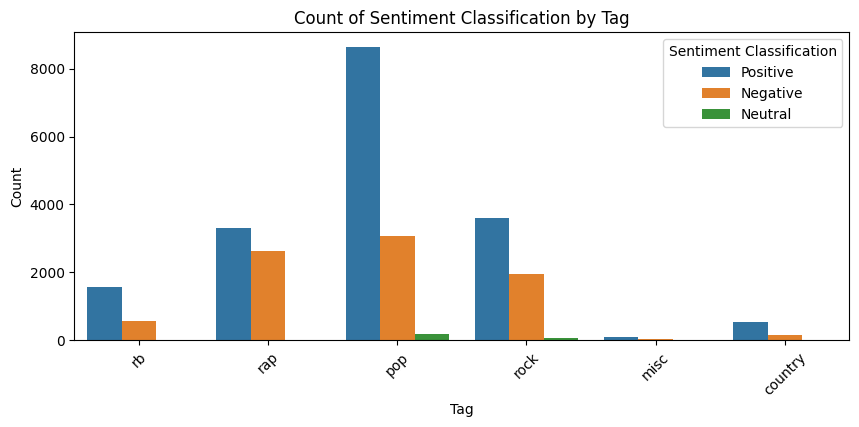

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot
plt.figure(figsize=(10, 4))
sns.countplot(data=train_df, x='tag', hue='classification')

# Set the title and labels
plt.title('Count of Sentiment Classification by Tag')
plt.xlabel('Tag')
plt.ylabel('Count')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Sentiment Classification')
plt.show()


In [187]:
train_df[train_df['tag'] == 'rap']['classification'].value_counts()

classification
Positive    3320
Negative    2631
Neutral        9
Name: count, dtype: int64

In [188]:
import pandas as pd
from collections import Counter
import re


def extract_top_words(text, top_n=20):
    words = [word for word in re.findall(r'\w+', text.lower()) if len(word) > 3]
    word_counts = Counter(words)
    common_words = word_counts.most_common(top_n)
    return {word: count for word, count in common_words}

def genre_top_words(genre):
  dictionary_w_words = {}
  for classify in train_df[train_df['tag'] == genre]['classification'].unique():
      classify_df = train_df[train_df['classification'] == classify]
      all_lyrics = ' '.join(classify_df['lyrics'])
      top_words = extract_top_words(all_lyrics, top_n=10)
      dictionary_w_words[classify] = top_words

  df_top_words = pd.DataFrame(dictionary_w_words)

  df_top_words = df_top_words.fillna(0)

  return df_top_words

genre_dict = {}
for genre in train_df['tag'].unique():
  genre_dict[genre] = genre_top_words(genre)

genre_dict


{'rb':         Positive  Negative  Neutral
 love     48840.0       0.0      0.0
 yeah     46973.0   25390.0    202.0
 like     46193.0   25134.0    549.0
 know     45815.0   21527.0    340.0
 time     21994.0   10070.0    172.0
 baby     21514.0       0.0    193.0
 wanna    19435.0       0.0      0.0
 never    19396.0    9495.0    170.0
 want     19283.0    9393.0    328.0
 feel     18508.0       0.0    274.0
 nigga        0.0   11448.0      0.0
 bitch        0.0   10598.0      0.0
 fuck         0.0   10075.0      0.0
 back         0.0    9184.0      0.0
 mind         0.0       0.0    234.0
 cannot       0.0       0.0    161.0,
 'rap':         Positive  Negative  Neutral
 love     48840.0       0.0      0.0
 yeah     46973.0   25390.0    202.0
 like     46193.0   25134.0    549.0
 know     45815.0   21527.0    340.0
 time     21994.0   10070.0    172.0
 baby     21514.0       0.0    193.0
 wanna    19435.0       0.0      0.0
 never    19396.0    9495.0    170.0
 want     19283.0    939

In [189]:
genre_dict['rap'].sum(axis=1)[:10]

love     48840.0
yeah     72565.0
like     71876.0
know     67682.0
time     32236.0
baby     21707.0
wanna    19435.0
never    29061.0
want     29004.0
feel     18782.0
dtype: float64

In [190]:
genre_dict['pop'].sum(axis=1)[:10]

love     48840.0
yeah     72565.0
like     71876.0
know     67682.0
time     32236.0
baby     21707.0
wanna    19435.0
never    29061.0
want     29004.0
feel     18782.0
dtype: float64

<Figure size 1200x1000 with 0 Axes>

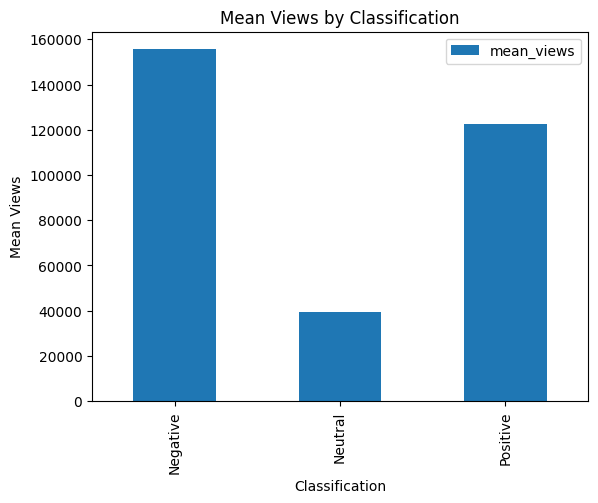

In [191]:
mean_views = train_df.groupby('classification').agg(mean_views=('views', 'mean'))

plt.figure(figsize=(12, 10))
mean_views.plot(kind='bar')
plt.title('Mean Views by Classification')
plt.xlabel('Classification')
plt.ylabel('Mean Views')
plt.show()


In [192]:
for col in df.columns:
  print(col)

highest_popularity
total_streams
num_days_on_chart
af_danceability
views
popular
unique_words
mean_tfidf
popular


In [193]:
features = df.drop(['popular'],axis=1)
target = df['popular']
target.iloc[:,0]

38398    1
46163    1
57350    1
58684    0
19947    0
        ..
966      1
57952    1
23737    0
66197    0
8206     1
Name: popular, Length: 26466, dtype: int64

In [194]:
traindata = train_df[['lyrics', 'popular']].copy()
traindata

,lyrics,popular
38398,1 keep low know thats sure safe people told ye...,1
46163,morgan freeman great men great ideal separated...,1
57350,kid ink ty dolla ign let go woo tryna get hitm...,1
58684,got nowhere go got better place go doesnt matt...,0
19947,fighting everything back im gonna let go im re...,0
...,...,...
966,megan thee stallion jt yung miami real hot gir...,1
57952,section 8 straight cooked motherfucker whats h...,1
23737,1 memory serf right would tuck almost every ni...,0
66197,loose loose loose change got little money chan...,0


In [195]:
testdata = test_df[['lyrics', 'popular']].copy()
testdata

,lyrics,popular
38405,guapdad 4000 yeah look james delgado would loo...,0
17247,1 swear never felt like aint like girl ive met...,0
15513,1 seems like summer night every night one time...,0
17782,produced kanye west neptune kanye west james b...,1
42054,alright alright alright alright alright alrigh...,0
...,...,...
62049,1 wa teenage wedding old folk wished well coul...,1
45874,carisma 1 chris brown party weekend know worki...,0
55719,yo friday night tryna fuck look real good look...,1
51220,1 want level yeah level sucker body type fire ...,0


In [196]:
traindata['popular'].value_counts()

popular
0    14298
1    12168
Name: count, dtype: int64

Token indices sequence length is longer than the specified maximum sequence length for this model (569 > 512). Running this sequence through the model will result in indexing errors


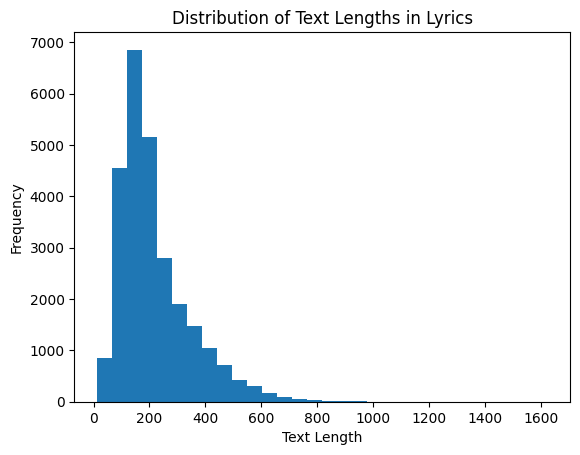

Max length: 1626
Average length: 218.55830121665534
95th percentile length: 482


In [198]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
import torch
from transformers import AdamW
from tqdm import tqdm

df = train_df[['lyrics', 'tag']].copy()

df['tag'] = df['tag'].astype(str)
df['tag'] = df['tag'].astype('category')
df['label'] = df['tag'].cat.codes

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

text_lengths = [len(tokenizer.encode(text, add_special_tokens=True)) for text in df['lyrics']]
plt.hist(text_lengths, bins=30)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths in Lyrics')
plt.show()

print(f"Max length: {max(text_lengths)}")
print(f"Average length: {sum(text_lengths) / len(text_lengths)}")
print(f"95th percentile length: {sorted(text_lengths)[int(len(text_lengths) * 0.95)]}")

In [199]:
correlation = train_df['views'].corr(train_df['total_streams'])

print(f"The correlation between column1 and column2 is: {correlation}")

The correlation between column1 and column2 is: 0.5165348245280543


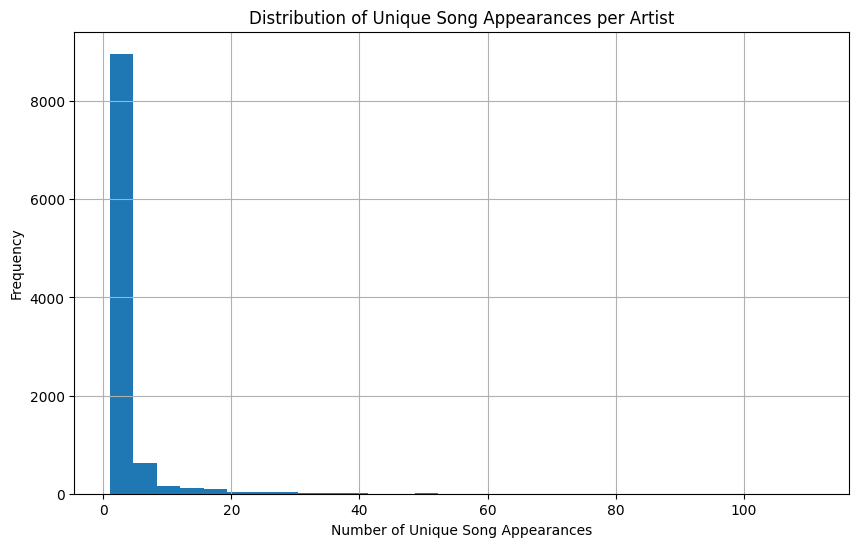

In [200]:
import matplotlib.pyplot as plt

artist_song_counts = train_df.groupby('artist')['title'].nunique()

plt.figure(figsize=(10, 6))
artist_song_counts.hist(bins=30)
plt.title('Distribution of Unique Song Appearances per Artist')
plt.xlabel('Number of Unique Song Appearances')
plt.ylabel('Frequency')
plt.show()


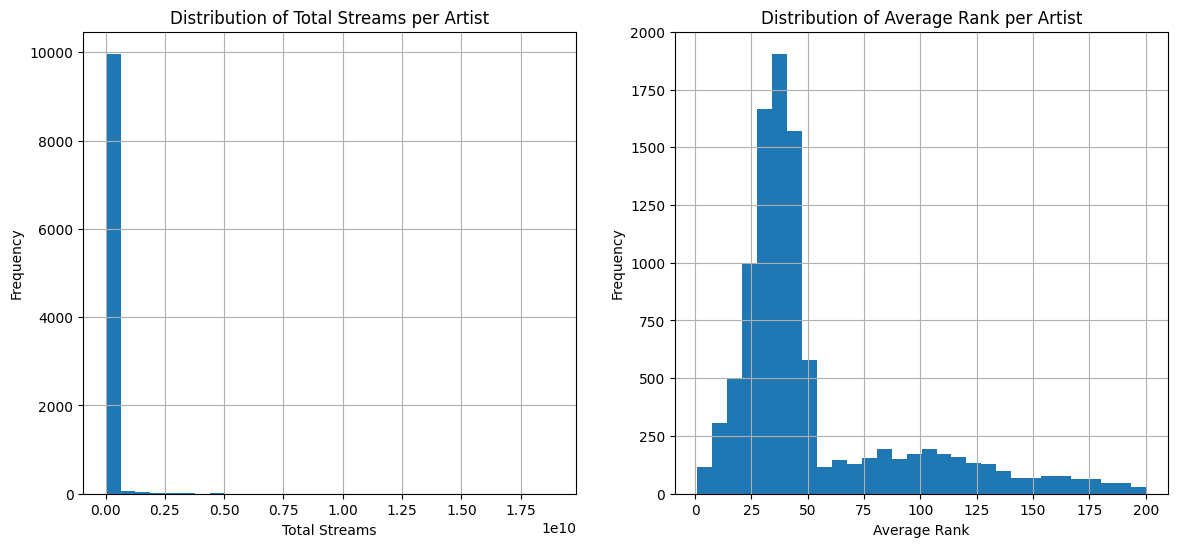

In [201]:
artist_viewership = train_df.groupby('artist').agg({
    'total_streams': 'sum',
    'median_rank': 'mean'
}).rename(columns={'streams': 'total_streams', 'median_rank': 'average_rank'})

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
artist_viewership['total_streams'].hist(bins=30)
plt.title('Distribution of Total Streams per Artist')
plt.xlabel('Total Streams')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
artist_viewership['average_rank'].hist(bins=30)
plt.title('Distribution of Average Rank per Artist')
plt.xlabel('Average Rank')
plt.ylabel('Frequency')

plt.show()

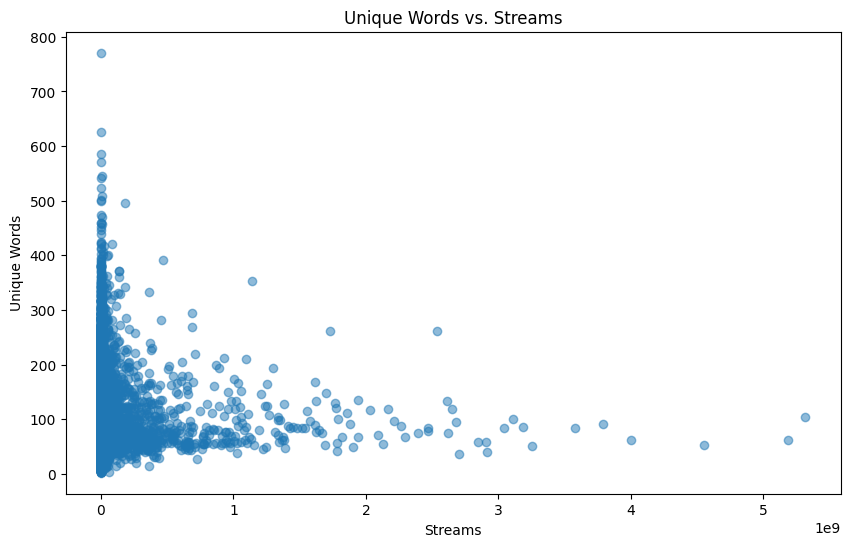

In [202]:
def count_unique_words(lyrics):
    return len(set(lyrics.split()))

train_df['unique_words'] = train_df['lyrics'].apply(count_unique_words)

plt.figure(figsize=(10, 6))
plt.scatter(train_df['total_streams'], train_df['unique_words'], alpha=0.5)
plt.title('Unique Words vs. Streams')
plt.xlabel('Streams')
plt.ylabel('Unique Words')
plt.show()


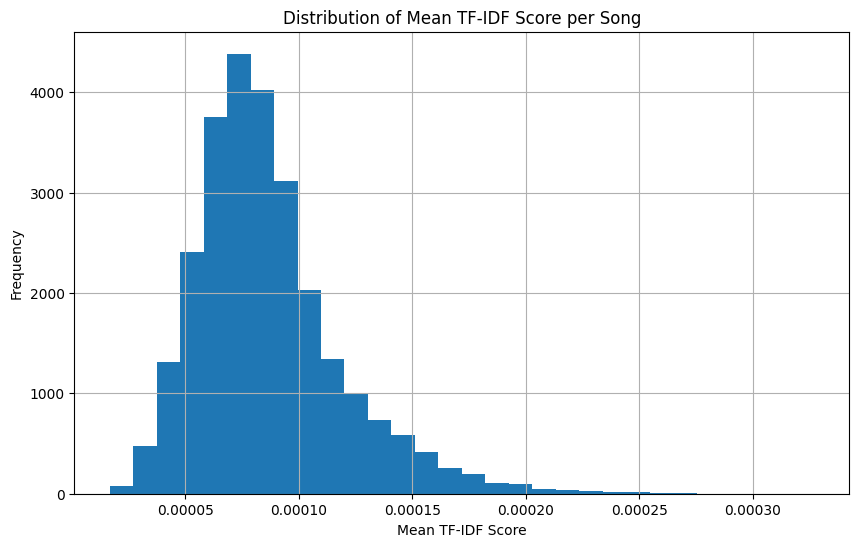

In [203]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(lowercase = True)
tfidf_matrix = vectorizer.fit_transform(train_df['lyrics'])

mean_tfidf = np.mean(tfidf_matrix.toarray(), axis=1)

train_df['mean_tfidf'] = mean_tfidf

plt.figure(figsize=(10, 6))
train_df['mean_tfidf'].hist(bins=30)
plt.title('Distribution of Mean TF-IDF Score per Song')
plt.xlabel('Mean TF-IDF Score')
plt.ylabel('Frequency')
plt.show()


In [204]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    lowercase=True,
    token_pattern=r'\b\w{4,}\b',  #This code is filtering word length more than 4
    max_df=0.85,  # Ignore terms that appear in more than 85% of the documents
    min_df=5     # Ignore terms that appear in fewer than 5 documents
)

tfidf_matrix = vectorizer.fit_transform(train_df['lyrics'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df.head()



,1000,10000,100k,1010,1017,1030,10th,11th,1234,12th,...,zoot,zooted,zoots,zulu,zurich,ándale,еnough,еven,еver,еyes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


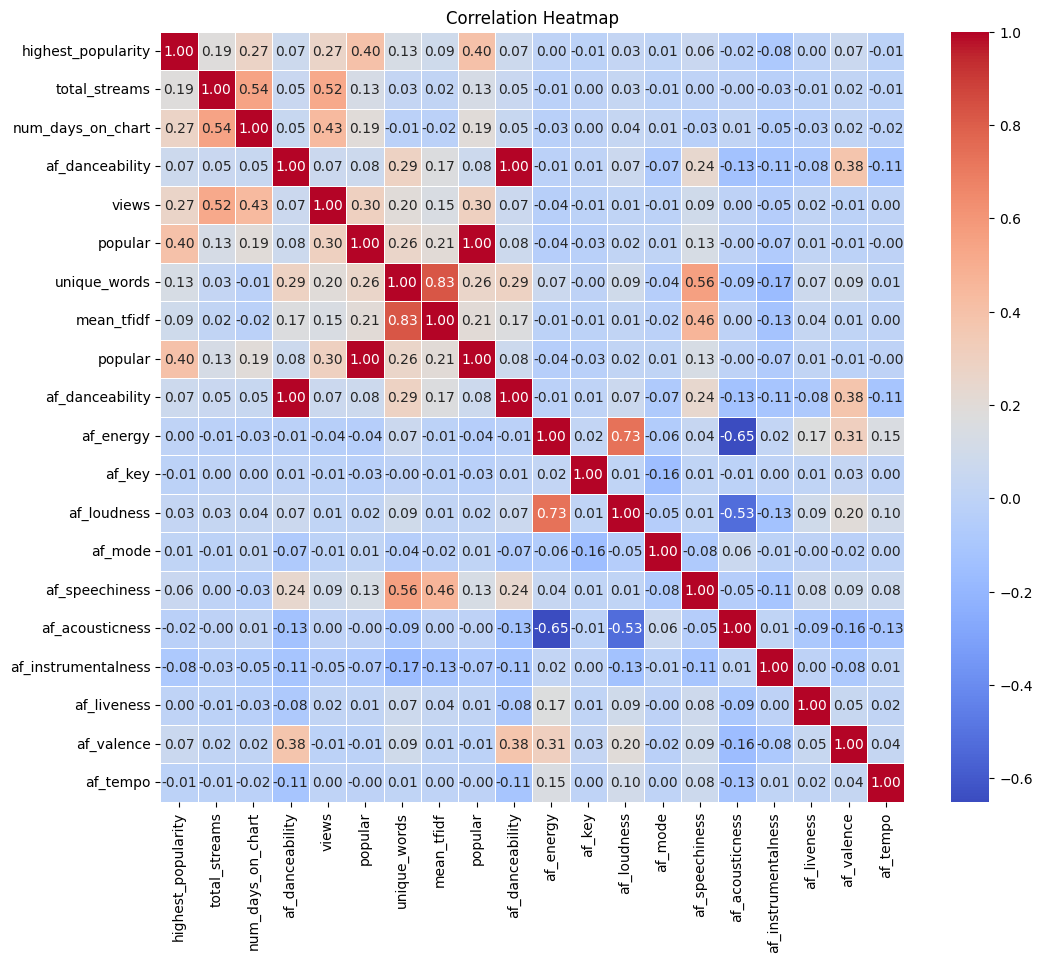

In [205]:
df = train_df[['highest_popularity','total_streams','num_days_on_chart','af_danceability','views','popular','unique_words','mean_tfidf','popular','af_danceability', 'af_energy',
       'af_key', 'af_loudness', 'af_mode', 'af_speechiness', 'af_acousticness',
       'af_instrumentalness', 'af_liveness', 'af_valence', 'af_tempo']]
df.dropna(inplace=True)

corr = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

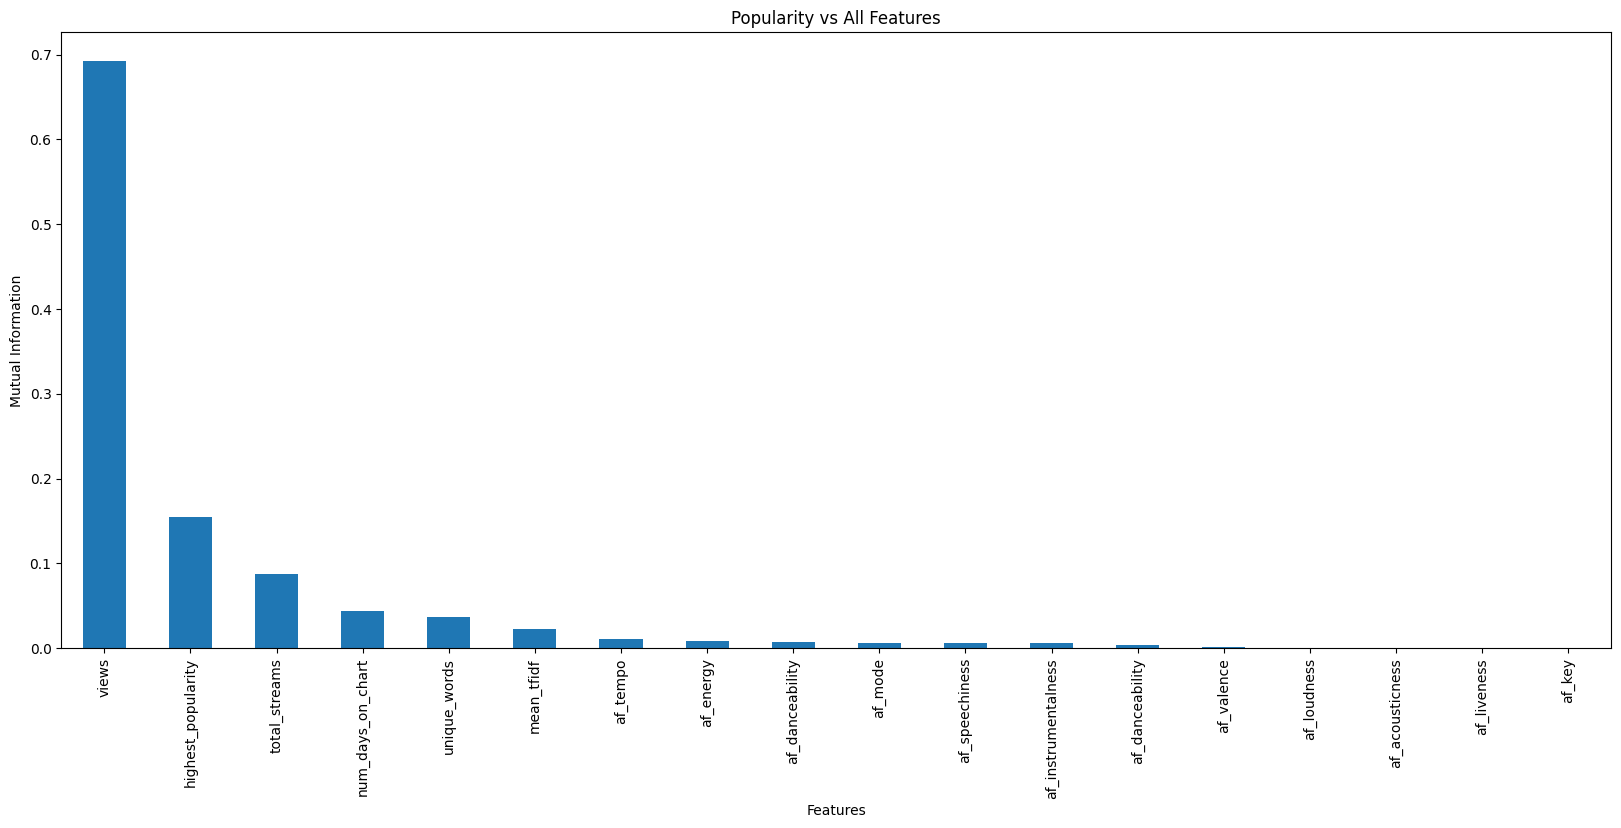

In [206]:
features = df.drop(['popular'],axis=1)
target = df['popular']


mutual_info = mutual_info_classif(features, target.iloc[:,0])
mutual_info
mutual_info = pd.Series(mutual_info)
mutual_info.index = features.columns
mutual_info.sort_values(ascending=False)

sorted_mutual_info = mutual_info.sort_values(ascending=False)
plt.figure(figsize=(20, 8))
sorted_mutual_info.plot(kind='bar')
plt.title('Popularity vs All Features')
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.show()

Lyricism Consistency:

Calculate average cosine similarity between song lyrics embeddings for each artist with many views: Use a pre-trained model like BERT to obtain embeddings for lyrics. Calculate cosine similarity between lyrics of the same artist.

In [207]:
!pip install bertopic

In [208]:
train_df.loc[train_df['tag'] == 'rb', 'tag'] = 'other'
train_df.loc[train_df['tag'] == 'country', 'tag'] = 'other'
train_df.loc[train_df['tag'] == 'misc', 'tag'] = 'other'

In [209]:
train_df['tag'].value_counts()

tag
pop      11896
rap       5960
rock      5628
other     2982
Name: count, dtype: int64

In [210]:
from bertopic import BERTopic
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

bert_topic_df = train_df.groupby('tag', group_keys=False).apply(lambda x: x.sample(1000, random_state = 42))

model = BERTopic(language="english", min_topic_size=50, nr_topics="auto", calculate_probabilities=False)
topics, probs = model.fit_transform(bert_topic_df['lyrics'])

bert_topic_df['topic'] = topics

topic_counts = bert_topic_df['topic'].value_counts()
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar')
plt.title('Distribution of Topics')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.show()

for topic in range(len(topic_counts)):
    if topic == -1:
        continue  # Skip the -1 topic which is typically used for outliers
    print(f"Topic {topic}:")
    words = model.get_topic(topic)
    print(words)


KeyboardInterrupt: 

In [ ]:
model.visualize_barchart(top_n_topics=len(topic_counts)).show()

In [ ]:
#model.visualize_topics().show()

In [ ]:
model.visualize_hierarchy().show()

In [ ]:
train_df.columns

In [ ]:
train_df['tag'].value_counts()

In [ ]:
train_df['tag'].value_counts()

In [ ]:
import pandas as pd
import numpy as np
import optuna
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import plotly.graph_objects as go
from sklearn.utils.class_weight import compute_class_weight

def create_genre_plot(train_df, test_df, genre=None):
    if genre is None:
        train_df_genre = train_df
        test_df_genre = test_df
    else:
        train_df_genre = train_df[train_df['tag'] == genre]
        test_df_genre = test_df[test_df['tag'] == genre]

    train_features = train_df_genre['lyrics']
    train_labels = train_df_genre['popular']
    test_features = test_df_genre['lyrics']
    test_labels = test_df_genre['popular']

    class_weights = compute_class_weight(class_weight='balanced',
                                         classes=np.unique(train_labels),
                                         y=train_labels)
    class_weights = {i: class_weights[i] for i in range(len(class_weights))}

    def objective(trial):
        C = trial.suggest_float("C", 0.01, 10.0, log=True)
        max_iter = trial.suggest_int("max_iter", 100, 1000)
        solver = trial.suggest_categorical("solver", ["lbfgs", "liblinear", "saga"])

        pipeline = Pipeline([
            ('tfidf', TfidfVectorizer(lowercase=True,
                                      max_features=7000,
                                      token_pattern=r'\b\w{4,}\b',  # Filter words with length >= 4
                                      max_df=0.85,  # Ignore terms that appear in more than 85% of the documents
                                      min_df=5)),
            ('log_reg', LogisticRegression(C=C, solver=solver, max_iter=max_iter, class_weight=class_weights))
        ])

        score = sklearn.model_selection.cross_val_score(pipeline, train_features, train_labels, n_jobs=-1, cv=5)
        accuracy = score.mean()
        return accuracy

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=20)
    best_params = study.best_params

    final_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(lowercase=True,
                                  max_features=4000,
                                  token_pattern=r'\b\w{4,}\b',  # Filter words with length >= 4
                                  max_df=0.8,  # Ignore terms that appear in more than 85% of the documents
                                  min_df=4)),
        ('log_reg', LogisticRegression(C=best_params['C'], solver=best_params['solver'], max_iter=best_params['max_iter'], class_weight=class_weights))
    ])

    final_pipeline.fit(train_features, train_labels)

    train_predictions = final_pipeline.predict(train_features)
    test_predictions = final_pipeline.predict(test_features)

    train_accuracy = accuracy_score(train_labels, train_predictions)
    test_accuracy = accuracy_score(test_labels, test_predictions)

    train_report = classification_report(train_labels, train_predictions)
    test_report = classification_report(test_labels, test_predictions)

    print(f"Training Accuracy: {train_accuracy}")
    print("Training Classification Report:")
    print(train_report)

    print(f"Testing Accuracy: {test_accuracy}")
    print("Testing Classification Report:")
    print(test_report)

    tfidf_vectorizer = final_pipeline.named_steps['tfidf']
    log_reg = final_pipeline.named_steps['log_reg']
    feature_names = tfidf_vectorizer.get_feature_names_out()
    coefficients = log_reg.coef_[0]

    coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})
    coef_df['abs_coefficient'] = coef_df['coefficient'].apply(np.abs)
    sorted_coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False)

    top_10 = sorted_coef_df.head(10)
    bottom_10 = sorted_coef_df.tail(10)

    top_bottom_df = pd.concat([top_10, bottom_10])
    top_bottom_df = top_bottom_df.sort_values(by='coefficient', ascending=True)

    fig = go.Figure()
    colors = ['green' if coef >= 0 else 'red' for coef in top_bottom_df['coefficient']]

    fig.add_trace(go.Bar(
        y=top_bottom_df['feature'],
        x=top_bottom_df['coefficient'],
        orientation='h',
        marker_color=colors
    ))

    fig.update_layout(
        title=f'Top 10 and Bottom 10 Coefficients',
        xaxis_title='Coefficient',
        yaxis_title='Feature',
        xaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='LightGrey'),
        yaxis=dict(showgrid=False),
        plot_bgcolor='rgba(0,0,0,0)',
        barmode='group'
    )

    fig.show()

# Example usage
create_genre_plot(train_df, test_df, None)


In [ ]:
!pip install shap

In [ ]:
import pandas as pd
import numpy as np
import optuna
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import plotly.graph_objects as go
from sklearn.utils.class_weight import compute_class_weight
import shap

def create_genre_plot(train_df, test_df, genre=None):
    if genre is None:
        train_df_genre = train_df
        test_df_genre = test_df
    else:
        train_df_genre = train_df[train_df['tag'] == genre]
        test_df_genre = test_df[test_df['tag'] == genre]

    train_df_sample = train_df_genre.sample(frac=0.2, random_state=42)
    train_features = train_df_sample['lyrics']
    train_labels = train_df_sample['popular']
    test_features = test_df_genre['lyrics']
    test_labels = test_df_genre['popular']

    class_weights = compute_class_weight(class_weight='balanced',
                                         classes=np.unique(train_labels),
                                         y=train_labels)
    class_weights = {i: class_weights[i] for i in range(len(class_weights))}

    def objective(trial):
        n_estimators = trial.suggest_int("n_estimators", 200, 400)
        max_depth = trial.suggest_int("max_depth", 5, 20)
        min_samples_split = trial.suggest_int("min_samples_split", 10, 60)
        min_samples_leaf = trial.suggest_int("min_samples_leaf", 8, 30)
        max_features = trial.suggest_float("max_features", 0.5, 1.0)

        pipeline = Pipeline([
            ('tfidf', TfidfVectorizer(lowercase=True,
                                      max_features=4000,
                                      token_pattern=r'\b\w{4,}\b',
                                      max_df=0.85,
                                      min_df=4)),
            ('rf', RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_split=min_samples_split,
                                          min_samples_leaf=min_samples_leaf,
                                          max_features=max_features,
                                          class_weight=class_weights,
                                          n_jobs=-1,
                                          random_state=42,
                                          bootstrap=True))
        ])

        score = sklearn.model_selection.cross_val_score(pipeline, train_features, train_labels, n_jobs=-1, cv=3)
        accuracy = score.mean()
        return accuracy

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=5)
    best_params = study.best_params

    final_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(lowercase=True,
                                  max_features=4000,
                                  token_pattern=r'\b\w{4,}\b',
                                  max_df=0.85,
                                  min_df=4)),
        ('rf', RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                      max_depth=best_params['max_depth'],
                                      min_samples_split=best_params['min_samples_split'],
                                      min_samples_leaf=best_params['min_samples_leaf'],
                                      max_features=best_params['max_features'],
                                      class_weight=class_weights,
                                      n_jobs=-1,
                                      random_state=42))
    ])

    final_pipeline.fit(train_features, train_labels)

    train_predictions = final_pipeline.predict(train_features)
    test_predictions = final_pipeline.predict(test_features)

    train_accuracy = accuracy_score(train_labels, train_predictions)
    test_accuracy = accuracy_score(test_labels, test_predictions)

    train_report = classification_report(train_labels, train_predictions)
    test_report = classification_report(test_labels, test_predictions)

    print(f"Training Accuracy: {train_accuracy}")
    print("Training Classification Report:")
    print(train_report)

    print(f"Testing Accuracy: {test_accuracy}")
    print("Testing Classification Report:")
    print(test_report)

    tfidf_vectorizer = final_pipeline.named_steps['tfidf']
    rf = final_pipeline.named_steps['rf']
    feature_names = tfidf_vectorizer.get_feature_names_out()
    importances = rf.feature_importances_

    importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    importance_df = importance_df.sort_values(by='importance', ascending=False)

    top_10 = importance_df.head(10)
    bottom_10 = importance_df.tail(10)

    top_bottom_df = pd.concat([top_10, bottom_10])
    top_bottom_df = top_bottom_df.sort_values(by='importance', ascending=True)

    fig = go.Figure()
    colors = ['green' if importance >= 0 else 'red' for importance in top_bottom_df['importance']]

    fig.add_trace(go.Bar(
        y=top_bottom_df['feature'],
        x=top_bottom_df['importance'],
        orientation='h',
        marker_color=colors
    ))

    fig.update_layout(
        title=f'Top 10 and Bottom 10 Feature Importances',
        xaxis_title='Importance',
        yaxis_title='Feature',
        xaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='LightGrey'),
        yaxis=dict(showgrid=False),
        plot_bgcolor='rgba(0,0,0,0)',
        barmode='group'
    )

    fig.show()

    return final_pipeline, tfidf_vectorizer, train_features, test_features

final_pipeline, tfidf_vectorizer, train_features,test_features = create_genre_plot(train_df, test_df, None)




In [ ]:
def predict_text(text, model):
    processed_text = [text]

    prediction = model.predict(processed_text)

    prediction_prob = model.predict_proba(processed_text)

    return prediction[0], prediction_prob

example_text = """Python Serenade: A Data Science Love Song in the style of Taylor Swift
(Verse 1)
In a world of numbers, I found my sanctuary,
Where algorithms dance, and insights are so merry.
Python's my partner, in this digital romance,
Unlocking secrets hidden in the data's expanse.
(Pre-Chorus)
With every line of code, I'm painting a picture,
Of trends and patterns, oh, what a mixture!
From data points to graphs, it's a beautiful sight,
With Python by my side, I'm shining so bright.
(Chorus)
Data science in Python, oh, what a thrill,
Unraveling mysteries, with each skillful skill.
From pandas to matplotlib, my tools in hand,
I'm conquering the data, just as I planned.
(Verse 2)
CSVs and JSONs, they tell stories untold,
With NumPy and SciPy, I break the mold.
Regression and clustering, my dear companions,
In this world of data, where magic happens.
(Pre-Chorus)
With every function call, I'm forging ahead,
Predicting the future, where dreams are fed.
With Python as my guide, I'm never alone,
In this journey of data, where knowledge is sown.
(Chorus)
Data science in Python, oh, what a thrill,
Unraveling mysteries, with each skillful skill.
From pandas to matplotlib, my tools in hand,
I'm conquering the data, just as I planned.
(Bridge)
From data wrangling woes to model selection,
Python's my muse, my source of affection.
In this symphony of code, I find my muse,
In the world of data, there's nothing to lose.
(Chorus)
Data science in Python, oh, what a thrill,
Unraveling mysteries, with each skillful skill.
From pandas to matplotlib, my tools in hand,
I'm conquering the data, just as I planned.
(Outro)
So here's to Python, my partner in crime,
In the realm of data, where we'll shine.
With Taylor Swift's spirit, and Python's embrace,
I'll dance through the data, with style and grace."""

predicted_label, prediction_probabilities = predict_text(example_text, final_pipeline)

print(f"Predicted Label: {predicted_label}")
print(f"Prediction Probabilities: {prediction_probabilities}")

In [ ]:
!pip install nbconvert

In [ ]:
!pip install nbconvert pipreqs

!jupyter nbconvert --output-dir="./drive/MyDrive" --to script milestone.ipynb

import os

print("Current directory contents before changing directory:")
print(os.listdir())

print("\nContents of the 'reqs' directory:")
print(os.listdir('./reqs'))

%cd reqs
!pipreqs .


In [ ]:
!pip install pipreqs

In [ ]:
%cd reqs
!pipreqs .

In [ ]:
import os

# List files in the current directory
print("Current directory contents before changing directory:")
print(os.listdir())

# List files in the 'drive/MyDrive/reqs' directory to verify the script was created
print("\nContents of the 'drive/MyDrive/reqs' directory:")
print(os.listdir('./drive/MyDrive/reqs'))

# Step 4: Change directory to 'drive/MyDrive/reqs' and generate requirements.txt
%cd drive/MyDrive/reqs

# Step 5: Run pipreqs with verbose output to ensure it detects the imports
!pipreqs . --force --print
!pipreqs . --force